# Проект:

# Принятие решений в бизнесе на основе данных

**Описание проекта**

*Контекст*  
Анализируем деятельность крупного интернет-магазина. Необходимо увеличить выручку.

Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты.

<font style="color:DeepPink; font-size:400%">•</font> **Часть 1. Приоритизация гипотез.**

В файле hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.

In [0]:
import pandas as pd
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = int(hypothesis['Hypothesis'].map(lambda x: len(x)).max()+1)

In [0]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<font style="color:DeepPink; font-size:200%">•</font> Примениv фреймворк ICE для приоритизации гипотез.

**ICE** *(от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»)* — один из самых популярных способов приоритизации задач:
<center><b>ICE = влияние * уверенность / усилия</b></center>

In [0]:
hypothesis['ICE'] = (hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
ice_df = hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)
ice_df

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


В лидеры выбились три гипотезы:
    
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

<font style="color:DeepPink; font-size:200%">•</font> Примениv фреймворк RICE для приоритизации гипотез.

**RICE** *(R от англ. reach, «охват»)*:
<center><b>RICE = охват * влияние * уверенность / усилия</b></center>

In [0]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']
rice_df = hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)
rice_df

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В лидеры с учетом охвата выходят гипотезы:
    
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

<font style="color:DeepPink; font-size:200%">•</font> Сравним результаты приоритизации ICE и RICE.

In [0]:
# Определим номер позиции гипотезы в ICE

ice_df = ice_df.reset_index().reset_index()
ice_df.columns = ['ice_position', 'hyp_number','Hypothesis', 'ICE']

# Определим номер позиции гипотезы в RICE

rice_df = rice_df.reset_index().reset_index()
rice_df.columns = ['rice_position', 'hyp_number','Hypothesis', 'RICE']

# Объединим рейтинги в общую таблицу, оставим в ней только столбец с номером гипотезы и позициями по ICE и RICE

ice_rice_df = ice_df.merge(rice_df, on='hyp_number')
ice_rice_df = ice_rice_df[['hyp_number', 'ice_position', 'rice_position']]

# Скорректируем порядковый номер позиции, чтобы отсчет начинался с 1, а не с 0

ice_rice_df['ice_position'] = ice_rice_df['ice_position']+1
ice_rice_df['rice_position'] = ice_rice_df['rice_position']+1

# Номер гипотезы приведем к строковому типу данных, чтобы их можно было отобразить как подписи на графике.

ice_rice_df['hyp_number'] = ice_rice_df['hyp_number'].astype('str')

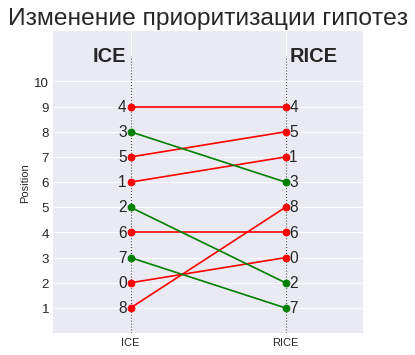

In [0]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='green' if p1[1]-p2[1] > 0 else 'red', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(5,5), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=0, ymax=11, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=0, ymax=11, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=ice_rice_df['ice_position'], x=np.repeat(1, ice_rice_df.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=ice_rice_df['rice_position'], x=np.repeat(3, ice_rice_df.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(ice_rice_df['ice_position'], ice_rice_df['rice_position'], ice_rice_df['hyp_number']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c, horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c, horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 11, 'ICE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 11, 'RICE', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Изменение приоритизации гипотез", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,12), ylabel='Position')
ax.set_xticks([1,3])
ax.set_xticklabels(["ICE", "RICE"])
plt.yticks(np.arange(1, 11, 1), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

Гипотеза **7** *(Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок)* в ICE была на 3-ей позиции, но с учетом охвата, она оказывается на 1-ой позиции в приоритизиации.

Гипотеза **2** *(Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа)* с учетом охвата перемещается с 5-ой позиции на 2-ую.

Гипотеза **0** *(Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)* с учетом охвата перемещается со 2-ой позиции на 3-ю.

Гипотеза **8** *(Запустить акцию, дающую скидку на товар в день рождения)*, которая была на 1-м месте в ICE с учетом охвата опускается на 5-ую позицию.

<font style="color:Green; font-size:400%">•</font> **Часть 2. Анализ A/B-теста.**

Мы провели A/B-тест и получили результаты, которые описаны в файлах orders.csv и visitors.csv.

In [0]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')
import datetime as dt
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [0]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [0]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null datetime64[ns]
revenue          1197 non-null int64
group            1197 non-null object
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.8+ KB


In [0]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [0]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null datetime64[ns]
group       62 non-null object
visitors    62 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.5+ KB


<font style="color:Green"><b>1.</b></font> Построим график кумулятивной выручки по группам.

In [0]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [0]:
ordersAggregated = (datesGroups
#                    Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста 
#                    равна группе из datesGroups
                    .apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],  orders['group'] == x['group'])]
#                          Агрегируем значения. Вычислим максимальную дату. Для группы тоже рассчитаем максимум, и хотя она 
#                          будет определённой, сделаем это, чтобы столбец 'group' не пропал из итогового вывода. Найдём число 
#                          уникальных ID заказов и пользователей. Подсчитаем сумму средних чеков:
                           .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', \
                                 'revenue' : 'sum'}), axis=1)
#                   Применим методы к каждой строке датафрейма: apply(axis=1) и отсортируем результаты по столбцам 
#                   'date' и 'group' 
                    .sort_values(by=['date','group'])
                   )
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [0]:
# Аналогично получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = (datesGroups
                      .apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                             .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                      .sort_values(by=['date','group'])
                     )
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [0]:
# Объединим обе таблицы в одной с понятными названиями столбцов:
cummulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cummulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


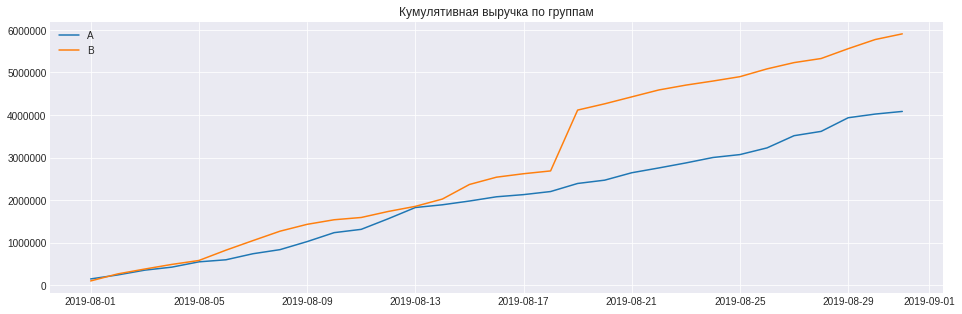

In [0]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cummulativeRevenueA = cummulativeData[cummulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cummulativeRevenueB = cummulativeData[cummulativeData['group']=='B'][['date','revenue', 'orders']]

plt.style.use('seaborn-darkgrid')
fig, test = plt.subplots(figsize = (16, 5))
# Строим график выручки группы А
test.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue'], label='A')
# Строим график выручки группы B
test.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue'], label='B')
test.set_title('Кумулятивная выручка по группам')
test.legend()

Выручка почти равномерно увеличивается в течение всего теста. <a id='cummulativeRevenue'>Хороший знак.</a>  

Однако график выручки группы В резко растет между 17 и 21 августа. Это может сигнализировать о всплеске числа заказов, либо о появлении очень дорогих заказов в выборке.  
После этого скачка сегмент B вырвался вперёд и продолжал лидировать весь остаток теста. Похоже, что аномально большие заказы всё-таки влияют на результаты. При заключительном анализе их нужно удалить.

<font style="color:Green"><b>2.</b></font> Построим график кумулятивного среднего чека по группам.

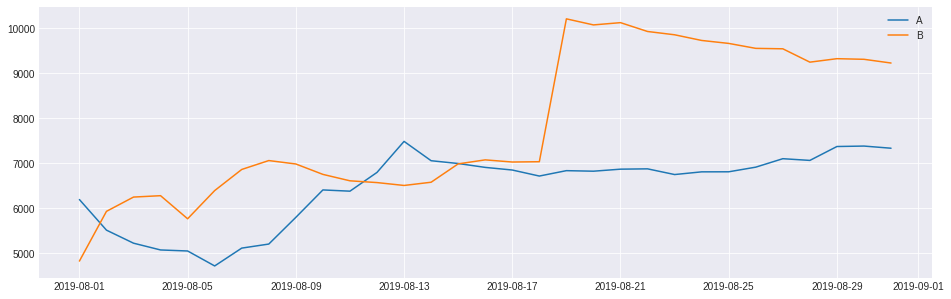

In [0]:
plt.subplots(figsize = (16, 5))
plt.plot(cummulativeRevenueA['date'], cummulativeRevenueA['revenue']/cummulativeRevenueA['orders'], label='A')
plt.plot(cummulativeRevenueB['date'], cummulativeRevenueB['revenue']/cummulativeRevenueB['orders'], label='B')
plt.legend()

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в середние теста попали крупные заказы (резкий всплеск на графике). Тогда ей нужно больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

<font style="color:Green"><b>3.</b></font> Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

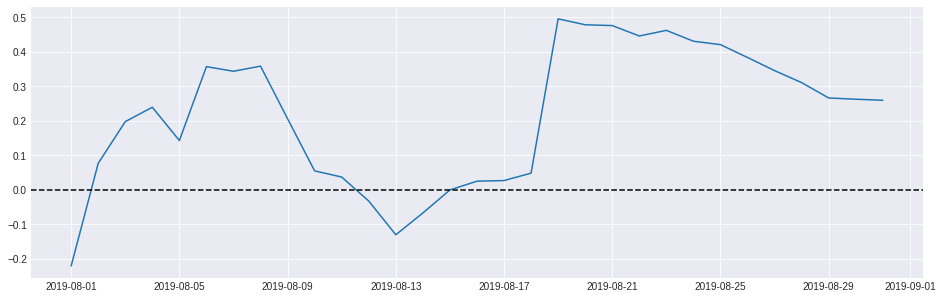

In [0]:
# собираем данные в одном датафрейме
mergedCummulativeRevenue = (cummulativeRevenueA
                            .merge(cummulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
                           )
 
# cтроим отношение средних чеков
plt.subplots(figsize = (16, 5))
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/\
         (mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
 
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

В нескольких точках график различия между сегментами резко «скачет». Где-то уж точно спрятались крупные заказы и выбросы! Найдём их позже.

<font style="color:Green"><b>4.</b></font> Построим график кумулятивной конверсии по группам.

['2019-08-01', '2019-09-01', 0, 0.05]

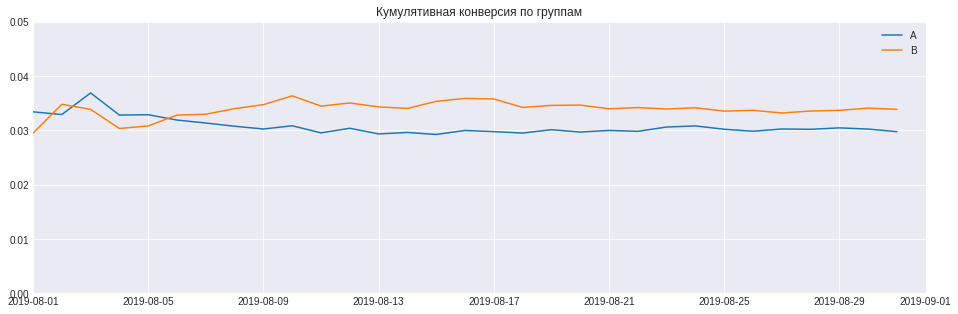

In [0]:
# считаем кумулятивную конверсию
cummulativeData['conversion'] = cummulativeData['orders']/cummulativeData['visitors']
 
# отделяем данные по группе A
cummulativeDataA = cummulativeData[cummulativeData['group']=='A']
 
# отделяем данные по группе B
cummulativeDataB = cummulativeData[cummulativeData['group']=='B']
 
# строим графики
fig, test = plt.subplots(figsize = (16, 5))
test.plot(cummulativeDataA['date'], cummulativeDataA['conversion'], label='A')
test.plot(cummulativeDataB['date'], cummulativeDataB['conversion'], label='B')
test.set_title('Кумулятивная конверсия по группам')
test.legend()
 
# задаем масштаб осей
test.axis(['2019-08-01', '2019-09-01', 0, 0.05])

В начале теста сегмент A некоторое время имел большую конверсию, но постепенно сегмент B выровнялся и зафикировался примерно около одного значения, больше значения сегмента A. [График по очищенным данным](#CummulativeConversion_filt)

<font style="color:Green"><b>5.</b></font> Построим график относительного изменения кумулятивной конверсии группы B к группе A.

['2019-08-01', '2019-09-01', -0.5, 0.5]

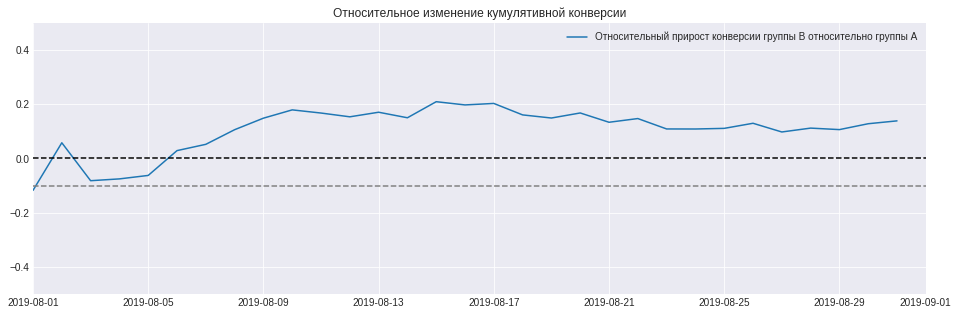

In [0]:
mergedCummulativeConversions = (cummulativeDataA[['date','conversion']]
                                .merge(cummulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', \
                                       suffixes=['A', 'B'])
                               )
fig, test = plt.subplots(figsize = (16, 5))
test.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/\
         mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
test.set_title('Относительное изменение кумулятивной конверсии')
test.legend()
 
test.axhline(y=0, color='black', linestyle='--')
test.axhline(y=-0.1, color='grey', linestyle='--')
test.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

Почти с самого начала теста группа B лидирует по конверсии: становится чуть лучше, чуть хуже, и в конце теста постепенно растет в направлении 20%.

<font style="color:Green"><b>6.</b></font> Построим точечный график количества заказов по пользователям.

In [0]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


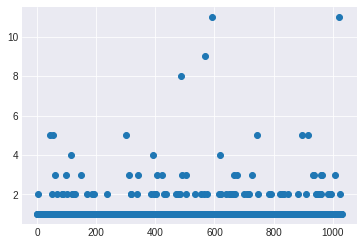

In [0]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
 
ordersByUsers.columns = ['visitorId','orders']
x_values = pd.Series(range(0,len(ordersByUsers)))
 
plt.scatter(x_values, ordersByUsers['orders'])

Много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет.
Посчитаем выборочные перцентили количества заказов на одного пользователя.

<font style="color:Green"><b>7.</b></font> Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [0]:
np.percentile(ordersByUsers['orders'], [95, 99])


array([2., 4.])

<font style="background-color:yellow">Не более 5% пользователей оформляли 2 заказа.  
Разумно выбрать 2 заказа на одного пользователя за нижнюю границу числа заказов, и отсеять аномальных пользователей по ней.</font>

<font style="color:Green"><b>8.</b></font> Построим точечный график стоимостей заказов.

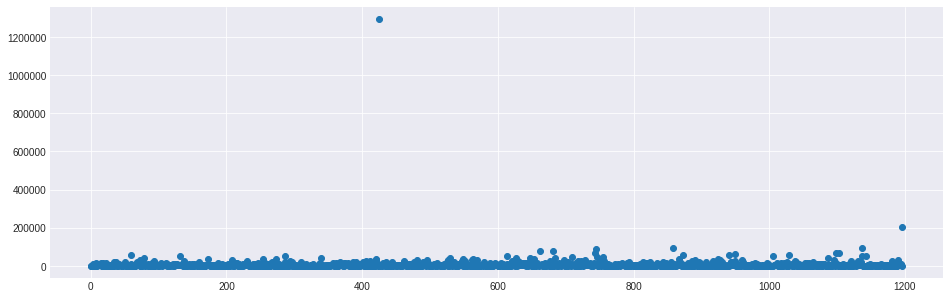

In [0]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.subplots(figsize = (16, 5))
plt.scatter(x_values, orders['revenue'])

Есть несколько дорогих заказов.
Нужно посчитать 95 и 99 перцентили, чтобы выбрать границу аномально дорогих заказов.

<font style="color:Green"><b>9.</b></font> Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [0]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

<font style="background-color:yellow">Не более 5% заказов дороже 28 000 рублей и не более 1% дороже 58 233,2 рублей.</font>

<font style="color:Green"><b>10.</b></font> Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [0]:
import scipy.stats as stats
visitorsADaily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = (visitorsADaily
                        .apply(lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']]
                               .agg({'date' : 'max', 'visitorsPerDateA' : 'sum'}), axis=1)
                       )
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']
visitorsACummulative

visitorsBDaily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']
 
visitorsBCummulative = (visitorsBDaily
                        .apply(lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']]
                               .agg({'date' : 'max', 'visitorsPerDateB' : 'sum'}), axis=1)
                       )
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = orders[orders['group']=='A'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']
 
ordersACummulative = ordersADaily.apply(
    lambda x: \
        ordersADaily[ordersADaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateA' : 'sum',
                'revenuePerDateA' : 'sum'}), axis=1).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']
 
ordersBDaily = orders[orders['group']=='B'][['date', 'transactionId', 'visitorId', 'revenue']]\
    .groupby('date', as_index=False)\
    .agg({'transactionId' : pd.Series.nunique, 'revenue' : 'sum'})
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']
 
ordersBCummulative = ordersBDaily.apply(
    lambda x: \
        ordersBDaily[ordersBDaily['date'] <= x['date']]\
            .agg({
                'date' : 'max',
                'ordersPerDateB' : 'sum',
                'revenuePerDateB' : 'sum'}), axis=1).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']
 
data = ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')\
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')\
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')\
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')\
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [0]:
# Посчитаем статистическую значимость различия в конверсии между группами.
# Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. 
# В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']
 
ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

In [0]:
#Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. 
# Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
                                                                           len(ordersByUsersA['orders'])), name='orders')],axis=0)
 
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                                                           len(ordersByUsersB['orders'])), name='orders')],axis=0)


In [0]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
 
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1))

0.008
0.138


Вывод: По «сырым» данным различия в конверсии групп A и B есть.  
Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.8% — второе число в выводе.


<font style="color:Green"><b>11.</b></font> Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [0]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.365
0.259


P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет.  
Впрочем, средний чек группы B значительно выше среднего чека группы A.

<font style="color:Green"><b>12.</b></font> Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.

Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами.

In [0]:
# Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, 
# совершивших заказы дороже 28 000 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers.
# Узнаем, сколько всего аномальных пользователей методом shape().

usersWithManyOrders = pd.concat(
    [ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], 
     ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
print(abnormalUsers.head(5))
print(abnormalUsers.shape)

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
Name: visitorId, dtype: int64
(74,)


Всего 74 аномальных пользователя.

Узнаем, как их действия повлияли на результаты теста.

<font style="color:#ff4d00"><font style="font-size:400%">•</font> Построим те же графики на очщенных данных.</font>

<font style="color:#ff4d00; font-size:200%">•</font> <a id='cummulativeRevenue_filt'>кумулятивная выручка</a>:

In [0]:
# Создадим отфильтрованную таблицу с заказами из которой удалим аномалии
orders_filtered = orders.query('visitorId not in @abnormalUsers')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


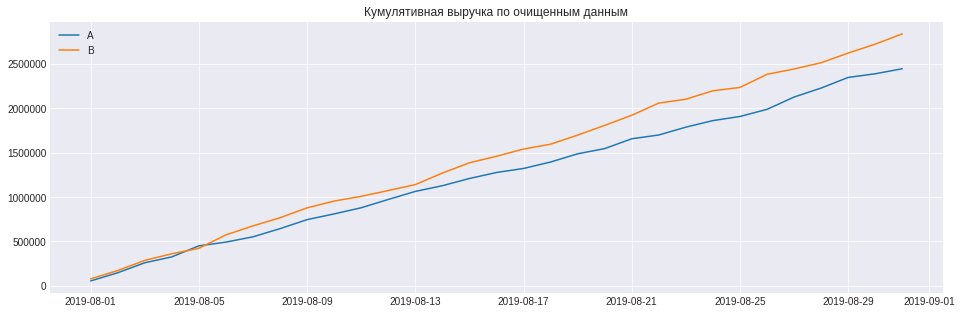

In [0]:
# повторим построение графика по кумулятивной выручке на очищенных данных
orders_filteredAggregated = (datesGroups
                    .apply(lambda x: orders_filtered[np.logical_and(orders['date'] <= x['date'],  orders['group'] == x['group'])]
                           .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', \
                                 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

cummulative_filtered_Data = orders_filteredAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cummulative_filtered_Data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cummulativeRevenueA_filt = cummulative_filtered_Data[cummulative_filtered_Data['group']=='A'][['date','revenue', 'orders']]
cummulativeRevenueB_filt = cummulative_filtered_Data[cummulative_filtered_Data['group']=='B'][['date','revenue', 'orders']]

plt.style.use('seaborn-darkgrid')
fig, test = plt.subplots(figsize = (16, 5))
# Строим график выручки группы А
test.plot(cummulativeRevenueA_filt['date'], cummulativeRevenueA_filt['revenue'], label='A')
# Строим график выручки группы B
test.plot(cummulativeRevenueB_filt['date'], cummulativeRevenueB_filt['revenue'], label='B')
test.set_title('Кумулятивная выручка по очищенным данным')
test.legend()

Вот тут всё получилось совсем гладенько :) [Назад, к полным данным](#cummulativeRevenue)

<font style="color:#ff4d00; font-size:200%">•</font> <a id='CummulativeConversion_filt'>кумулятивная конверсия</a>:

['2019-08-01', '2019-09-01', 0, 0.05]

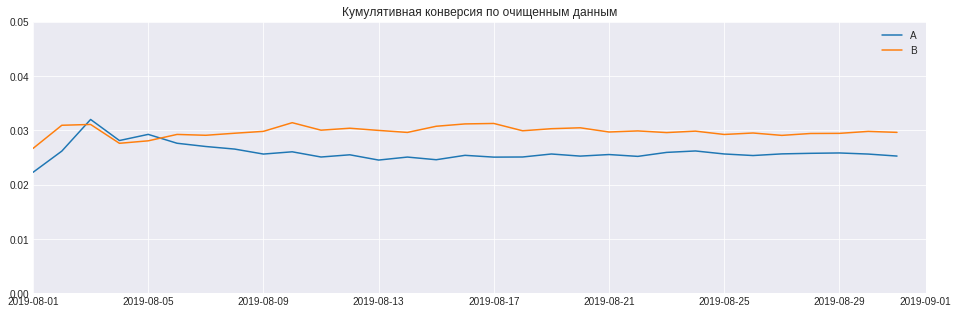

In [0]:
# построим график по кумулятивной конверсии на очищенных данных
cummulative_filtered_Data['conversion'] = cummulative_filtered_Data['orders']/cummulative_filtered_Data['visitors']
 
cummulative_filtered_DataA = cummulative_filtered_Data[cummulative_filtered_Data['group']=='A']
 
cummulative_filtered_DataB = cummulative_filtered_Data[cummulative_filtered_Data['group']=='B']
 
fig, test = plt.subplots(figsize = (16, 5))
test.plot(cummulative_filtered_DataA['date'], cummulative_filtered_DataA['conversion'], label='A')
test.plot(cummulative_filtered_DataB['date'], cummulative_filtered_DataB['conversion'], label='B')
test.set_title('Кумулятивная конверсия по очищенным данным')
test.legend()
 
test.axis(['2019-08-01', '2019-09-01', 0, 0.05])

На очищенных данных значения немного ниже, но общая тенденция сохраняется: В конце теста сегмент В стабильно лучше А.

<font style="color:#ff4d00; font-size:200%">•</font> <a id='cummulativeRevenue'>отношение конверсий</a>:

['2019-08-01', '2019-09-01', -0.5, 0.5]

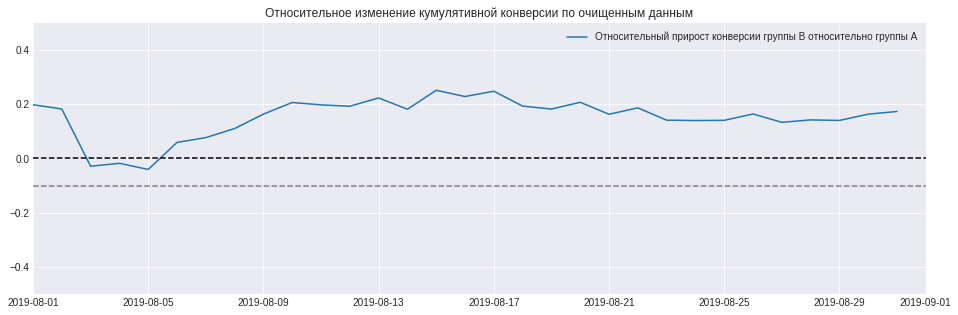

In [0]:
mergedCummulativeConversions_filt = (cummulative_filtered_DataA[['date','conversion']]
                                .merge(cummulative_filtered_DataB[['date','conversion']], left_on='date', right_on='date', how='left', \
                                       suffixes=['A', 'B'])
                               )
fig, test = plt.subplots(figsize = (16, 5))
test.plot(mergedCummulativeConversions_filt['date'], mergedCummulativeConversions_filt['conversionB']/\
         mergedCummulativeConversions_filt['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
test.set_title('Относительное изменение кумулятивной конверсии по очищенным данным')
test.legend()
 
test.axhline(y=0, color='black', linestyle='--')
test.axhline(y=-0.1, color='grey', linestyle='--')
test.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

График относительного изменения кумулятивной конверсии почти не изменился.  
Только по очищенным данным группа В была лучше группы А уже на старте, потом ненадолго потеряла свои позиции, но вернула и до конца теста лидирует.

<font style="color:Green"><b>13.</b></font> Посчитайем статистическую значимость различий в конверсии и среднем чеке заказа между группами по «очищенным» данным.

In [0]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - \
                                                          len(ordersByUsersA['orders'])),name='orders')],axis=0)
 
sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],\
                             pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - \
                                                          len(ordersByUsersB['orders'])),name='orders')],axis=0)
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.007
0.173


P-value практически не изменился. Но разница между сегментами выросла с 13,8% до 17,3%.  
Произошло ли что-нибудь с результатами по среднему чеку?

In [0]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))
 
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

0.369
-0.020


P-value немного увеличился, а разница между сегментами сократилась с 25,9% до -2%.

<font style="color:Green"><b>14.</b></font> Примите решение по результатам теста и объясните его. 

Варианты решений: 
1.  Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Какие выводы по тесту можем сделать?

Имеющиеся факты:

* Есть статистически значимое различие по конверсии между группами по «сырым» данным, и по данным после фильтрации аномалий. Группа В опережает группу А на 17,3% по чистым данным;
* Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий. Но разница между сегментами после фильтрации отрицательная;
* График различия конверсии между группами сообщает, что результаты группы B значительно лучше группы A и есть тенденция к улучшению:

['2019-08-01', '2019-09-01', -0.5, 0.5]

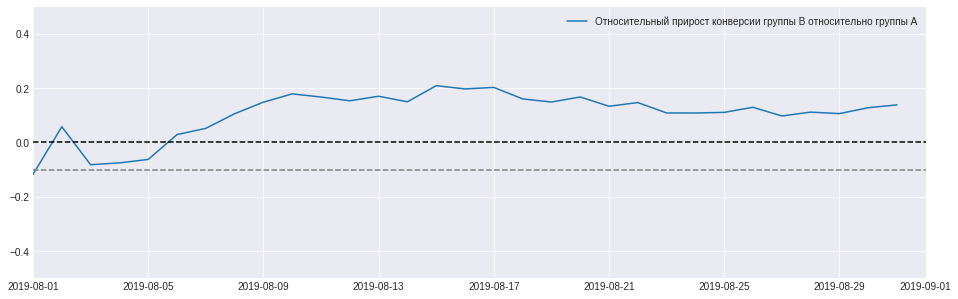

In [0]:
plt.subplots(figsize = (16, 5))
plt.plot(mergedCummulativeConversions['date'], mergedCummulativeConversions['conversionB']/\
         mergedCummulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()
 
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])

* График различия среднего чека говорит о том, что результаты группы B лучше группы А, но есть тенденция к сокращению различия.

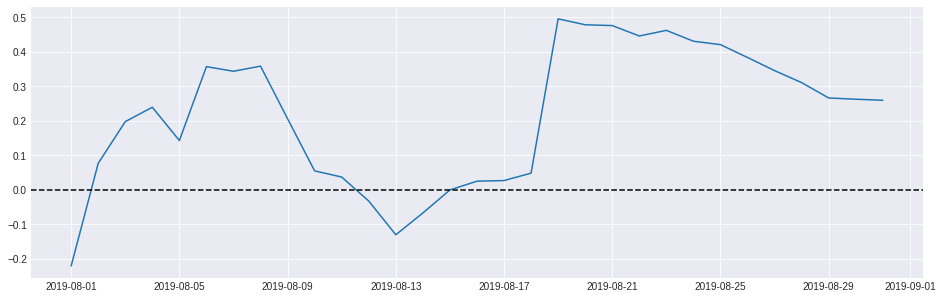

In [0]:
plt.subplots(figsize = (16, 5))
plt.plot(mergedCummulativeRevenue['date'], (mergedCummulativeRevenue['revenueB']/mergedCummulativeRevenue['ordersB'])/\
         (mergedCummulativeRevenue['revenueA']/mergedCummulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')

Тест можно остановить, зафиксировав победу группы В.